# MNIST

In [48]:
import numpy as np
import pandas as pd

# models/classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# tools for pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer, MinMaxScaler
from sklearn.decomposition import PCA

# tools for classifier evaluation
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score

# tools for plotting
import matplotlib.pyplot as plt

# for nan values checking
import math

## Global config

In [49]:

models = {
    "GaussianNB" : GaussianNB(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "SVC" : SVC(),
    "KNeighbours": KNeighborsClassifier(weights='distance'),
    "LogisticRegression": LogisticRegression(penalty = 'none')
}


## Load data

In [50]:
mnist_28x28_train = np.load("mnist_28x28_train.npy")
mnist_8x8_train = np.load("mnist_8x8_train.npy")
train_labels = np.load("train_labels.npy")

mnist_28x28_test = np.load("mnist_28x28_test.npy")
mnist_8x8_test = np.load("mnist_8x8_test.npy")

## Helpers

In [51]:
print(mnist_8x8_test.shape[0])
print(mnist_8x8_train.shape[0])
print(train_labels.size)

1250
3750
3750


##  Data exploration

### Question 1
Hint: `plt.imshow`

Picture number 1 in the train sets is of class:  7


'\nBoth images show a picture of digit 1, but the second one contains more features\nand so provides more information. The other one contains more generalized information\nand is very noisy. \nThe training dataset contains 3750 samples, which allows for more features to be used for predictions..\nAs a result, the dataset with the more pixels, the second one, should perform better.\n\n'

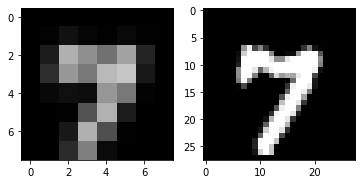

In [52]:
i = 1
print("Picture number {} in the train sets is of class: ".format(i), train_labels[i])

f, axarr = plt.subplots(1,2)
axarr[0].imshow(mnist_8x8_train[i], cmap='gray', vmin=0, vmax=255)
axarr[1].imshow(mnist_28x28_train[i], cmap='gray', vmin=0, vmax=255)
    
    
"""
Both images show a picture of digit 1, but the second one contains more features
and so provides more information. The other one contains more generalized information
and is very noisy. 
The training dataset contains 3750 samples, which allows for more features to be used for predictions..
As a result, the dataset with the more pixels, the second one, should perform better.

"""

##  Data Preparations

### Question 1

In [53]:
# Data Pre-processing
"""
No data cleaning is needed, because the dataset does not contain missing or null values.
Because the data in both datasets contains lots of noise, we cannot perform data reduction
because we may lose a significant amount of information.

Furthermore, because we have equal feature scaling, meaning all have values in the range [0, 255], 
there is little need to normalize the data for K-Nearest Neighbours, Logistic Regression or SVM. 
However, we will scale it to the range [ 0, 1.0] using a MinMaxScaler.

Lastly, because we want every sample to be a feature vector, we will reshape the data in 
both daatsets.

"""

# Reshape the data
mnist_28 = mnist_28x28_train.reshape(mnist_28x28_train.shape[0], 28 * 28)
mnist_8 = mnist_8x8_train.reshape(mnist_8x8_train.shape[0], 8 * 8)

scaler = MinMaxScaler()
mnist_28 = scaler.fit_transform(mnist_28)
mnist_8 = scaler.fit_transform(mnist_8)

# Discretize the data in 40
discretizer = KBinsDiscretizer(n_bins=40, encode='ordinal', strategy='uniform')
mnist_28_D = discretizer.fit_transform(mnist_28)
mnist_8_D = discretizer.fit_transform(mnist_8)



### Question 1

In [54]:
## Experiments
"""
We will divide the train set into two, leaving 40% of the data as out validation set. We
will also use cross-validation to get an average estimate of our classifiers' performance.
"""

"\nWe will divide the train set into two, leaving 40% of the data as out validation set. We\nwill also use cross-validation to get an average estimate of our classifiers' performance.\n"

### Question 2

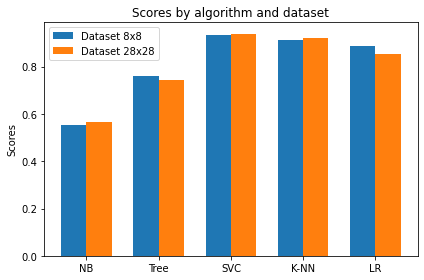

'\nThe bar plot below shows the average accuracy of the five algorithms when trained and tested\nwith each of the datasets and cross_validated with 40% validation set.\nAs we can see, the performance is from worse to best:\nNaive Bayes < Decision Tree < Logistic Regression < K-Nearest Neighbours < SVC\n\nFor the Naive Bayes, this is expected because it is greatly influenced by the huge amount\nof noise in the data.\n\nThe plot also shows that on average:\n    NaiveBayes, SVC and K-NN perform better with the larger dataset\n    Decision Tree and Logistic Regression perform better with the compressed dataset. \n'

In [56]:
# Now we will fit the models using

trainX_28, testX_28, trainY_28, testY_28 = train_test_split( mnist_28, train_labels, test_size = 0.4, random_state=42 )
trainX_28_D, testX_28_D, trainY_28_D, testY_28_D = train_test_split( mnist_28_D, train_labels, test_size = 0.4, random_state=42 )
trainX_8, testX_8, trainY_8, testY_8 = train_test_split( mnist_8, train_labels, test_size = 0.4, random_state=42 )
trainX_8_D, testX_8_D, trainY_8_D, testY_8_D = train_test_split( mnist_8_D, train_labels, test_size = 0.4, random_state=42 )


scores_8x8 = np.zeros(5) 
scores_28x28 = np.zeros(5)

index = 0

for name, model in models.items():

    scores_8x8[index] = np.mean(cross_validate(model, mnist_8, train_labels)['test_score'])
    scores_28x28[index] = np.mean(cross_validate(model, mnist_28, train_labels)['test_score'])
    
    index += 1


x = np.arange(5) 
fig, ax = plt.subplots()
width = 0.35
rects1 = ax.bar(x - width/2, scores_8x8, width, label='Dataset 8x8')
rects2 = ax.bar(x + width/2, scores_28x28, width, label='Dataset 28x28')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by algorithm and dataset')
ax.set_xticks(x)
ax.set_xticklabels(['NB', 'Tree', 'SVC', 'K-NN', 'LR'])
ax.legend()

fig.tight_layout()

plt.show()

'''
The bar plot below shows the average accuracy of the five algorithms when trained and tested
with each of the datasets and cross_validated with 40% validation set.
As we can see, the performance is from worse to best:
Naive Bayes < Decision Tree < Logistic Regression < K-Nearest Neighbours < SVC

For the Naive Bayes, this is expected because it is greatly influenced by the huge amount
of noise in the data.

The plot also shows that on average:
    NaiveBayes, SVC and K-NN perform better with the larger dataset
    Decision Tree and Logistic Regression perform better with the compressed dataset. 
'''

### Question 3

In [9]:
# TODO

### Question 4 

In [10]:
#TODO

### Question 5

In [11]:
#TODO

### Question 6

In [37]:
#TODO
prediction = np.array([-1] * len(mnist_8x8_test)) #TODO replace this with you own prediction
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_mnist.txt", index=False, header=False)